In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os

# Import API key
from api_keys import weather_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
## List for holding lat_lngs and cities
lat_lngs = []
cities = []

## Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

## Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    ## If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

## Print the city count to confirm sufficient count
len(cities)

618

In [3]:
## Create some empty lists to store our data
lat = []
lng = []
temp = []
humid = []
cloud = []
wind_sp = []
city_n = []
country = []
date = []

## Loop through our cities and use an API call to gather relevant data
units = "imperial"
url = "http://api.openweathermap.org/data/2.5/weather?appid="+ weather_key + "&units=" + units + "&q="
print("-------------------------\nBegin Data Retrieval\n-------------------------\n")
index = 1
for city in cities:
    try:
        response = requests.get(url+city).json()
        print(f"Processing Record {cities.index(city) +1} | {city}")
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"])
        humid.append(response["main"]["humidity"])
        cloud.append(response["clouds"]["all"])
        wind_sp.append(response["wind"]["speed"])
        city_n.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        
    except(KeyError):
        print(f"{city} not found. Skipping...")
        
print("\n-------------------------\nData Retrieval Complete\n-------------------------")

-------------------------
Begin Data Retrieval
-------------------------

Processing Record 1 | tuktoyaktuk
Processing Record 2 | lolua
lolua not found. Skipping...
Processing Record 3 | hermanus
Processing Record 4 | namibe
Processing Record 5 | paradwip
paradwip not found. Skipping...
Processing Record 6 | richards bay
Processing Record 7 | trat
Processing Record 8 | busselton
Processing Record 9 | constitucion
Processing Record 10 | cobija
Processing Record 11 | arraial do cabo
Processing Record 12 | lavrentiya
Processing Record 13 | umm durman
umm durman not found. Skipping...
Processing Record 14 | ribeira grande
Processing Record 15 | bredasdorp
Processing Record 16 | buala
Processing Record 17 | cape town
Processing Record 18 | sibu
Processing Record 19 | kaoma
Processing Record 20 | ushuaia
Processing Record 21 | butaritari
Processing Record 22 | jamestown
Processing Record 23 | hermosillo
Processing Record 24 | norman wells
Processing Record 25 | saryozek
Processing Record 26 

In [4]:
## Store into dataframe

weather_pd = pd.DataFrame({
    "City" : city_n,
    "Lat" : lat,
    "Lng" : lng,
    "Max Temp" : temp,
    "Humidity" : humid,
    "Cloudiness" : cloud,
    "Wind Speed" : wind_sp,
    "Country" : city_n,
    "Date" : date
})
weather_pd.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [5]:
## Display dataframe

weather_pd

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tuktoyaktuk,69.4541,-133.0374,41.00,93,90,25.32,Tuktoyaktuk,1624368450
1,Hermanus,-34.4187,19.2345,66.79,72,0,28.30,Hermanus,1624368451
2,Mossamedes,-15.1961,12.1522,74.03,78,0,11.50,Mossamedes,1624368451
3,Richards Bay,-28.7830,32.0377,78.17,32,9,12.35,Richards Bay,1624368452
4,Trat,12.5000,102.5000,83.79,89,100,3.91,Trat,1624368452
...,...,...,...,...,...,...,...,...,...
561,Belyy Yar,53.6039,91.3903,62.49,88,40,2.24,Belyy Yar,1624368686
562,Pozo Colorado,-23.4923,-58.7972,63.14,73,100,6.73,Pozo Colorado,1624368687
563,Big Rapids,43.6981,-85.4837,57.09,76,90,8.05,Big Rapids,1624368687
564,Yar-Sale,66.8333,70.8333,55.29,37,91,16.71,Yar-Sale,1624368688


In [6]:
## Use describe function

weather_pd.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,5.660000e+02
mean,19.494182,12.476457,70.541661,67.125442,54.803887,7.912367,1.624369e+09
std,33.351067,91.002494,14.896867,22.192006,38.991926,5.679458,8.429592e+01
min,-54.800000,-175.200000,31.820000,4.000000,0.000000,0.000000,1.624368e+09
25%,-8.114325,-65.336275,59.942500,55.000000,15.000000,3.440000,1.624368e+09
50%,22.262450,17.002950,72.930000,73.000000,61.500000,6.910000,1.624369e+09
75%,47.797325,92.862500,80.747500,83.000000,95.000000,11.300000,1.624369e+09
max,78.218600,179.316700,113.230000,100.000000,100.000000,33.150000,1.624369e+09


In [7]:
## Save data to csv

weather_pd.to_csv("output_data.csv", index=False)

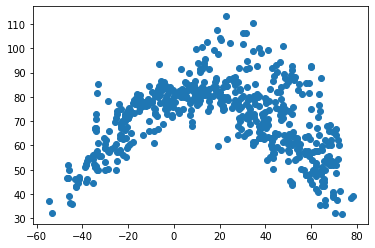

In [8]:
## Create scatter plot of latitude vs Temperature

plt.scatter(weather_pd["Lat"], weather_pd["Max Temp"])

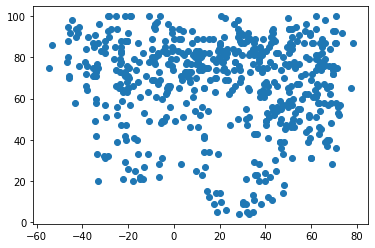

In [9]:
## Create scatter plot of latitude vs Humidity

plt.scatter(weather_pd["Lat"], weather_pd["Humidity"])

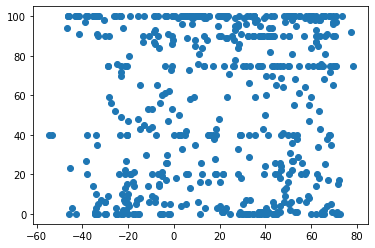

In [10]:
## Create scatter plot of latitude vs Cloudiness

plt.scatter(weather_pd["Lat"], weather_pd["Cloudiness"])

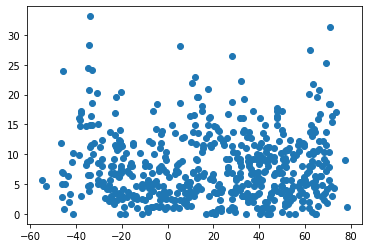

In [11]:
## Create scatter plot of latitude vs Wind Speed

plt.scatter(weather_pd["Lat"], weather_pd["Wind Speed"])